## Dependencies

In [4]:
from mpl_toolkits import mplot3d
# import numpy as np
import matplotlib.pyplot as plt
#%allows for nmot having to continuously call plt.show() in nb
%matplotlib inline
#rcParams changes the plot size
plt.rcParams["figure.figsize"] = 12.8, 9.6

## Create 3d Axes

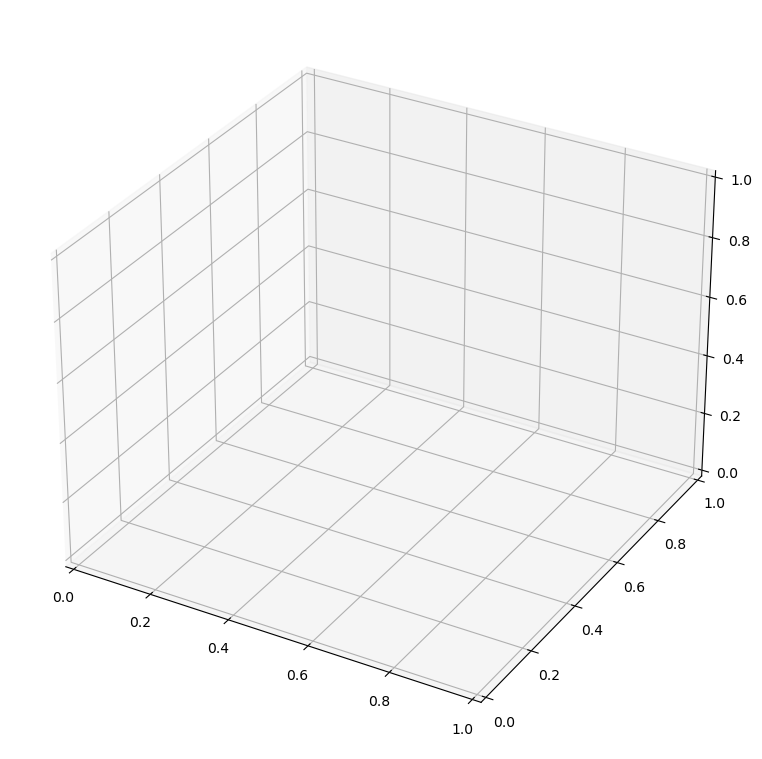

In [11]:
# Create blank 3d canvas to paint on
ax = plt.axes(projection='3d')

# Laplacian of Gaussian (LoG), which is a filter that is often used for edge detection in computer vision
# We’ll be rendering the reverse of the LoG filter. It is an elegant matrix with an interesting shape
import numpy as np
def LoG(x, y, sigma):
    temp = (x ** 2 + y ** 2) / (2 * sigma ** 2)
    return -1 / (np.pi * sigma ** 4) * (1 - temp) * np.exp(-temp)

# Generate some test data
N = 49
half_N = N // 2
X2, Y2 = np.meshgrid(range(N), range(N))
Z2 = -LoG(X2 - half_N, Y2 - half_N, sigma=8)
X1 = np.reshape(X2, -1)
Y1 = np.reshape(Y2, -1)
Z1 = np.reshape(Z2, -1)

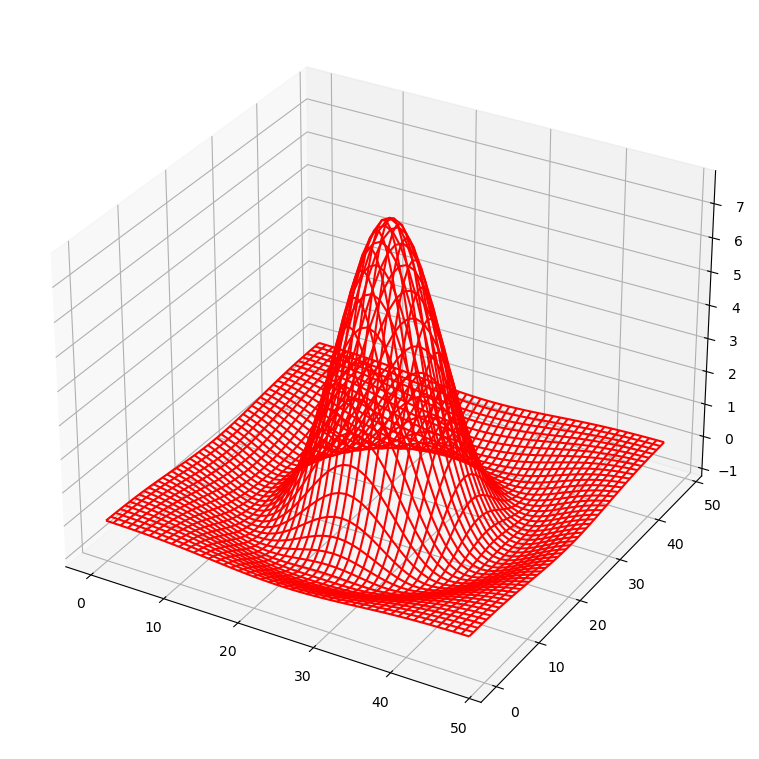

In [12]:
#Wireframe - most basic plot by simply connecting the nearby points on the grid
ax = plt.axes(projection='3d')
ax.plot_wireframe(X2, Y2, Z2, color='r')

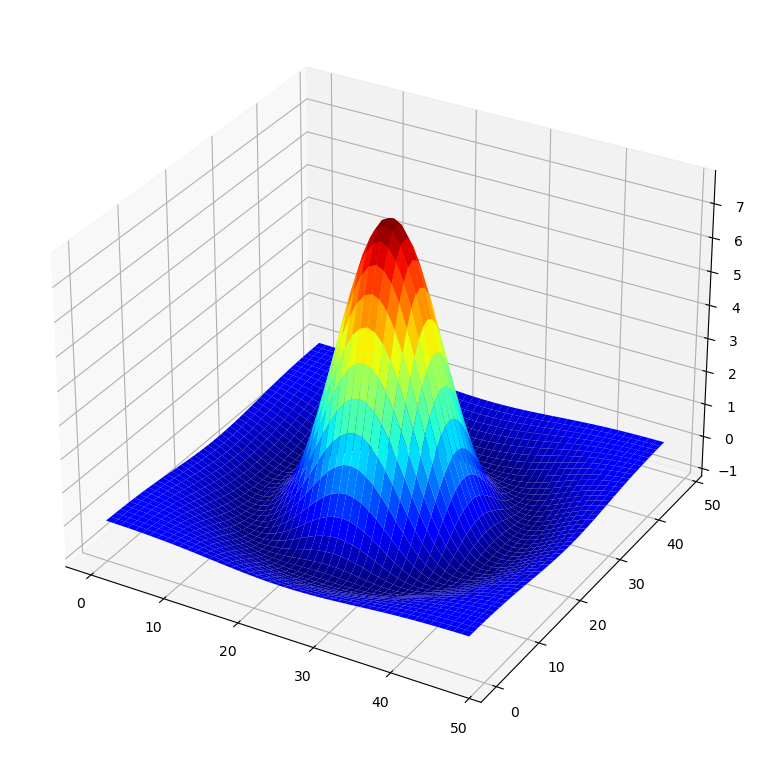

In [23]:
#Surface
ax = plt.axes(projection='3d')
ax.plot_surface(X2, Y2, Z2, cmap='jet')

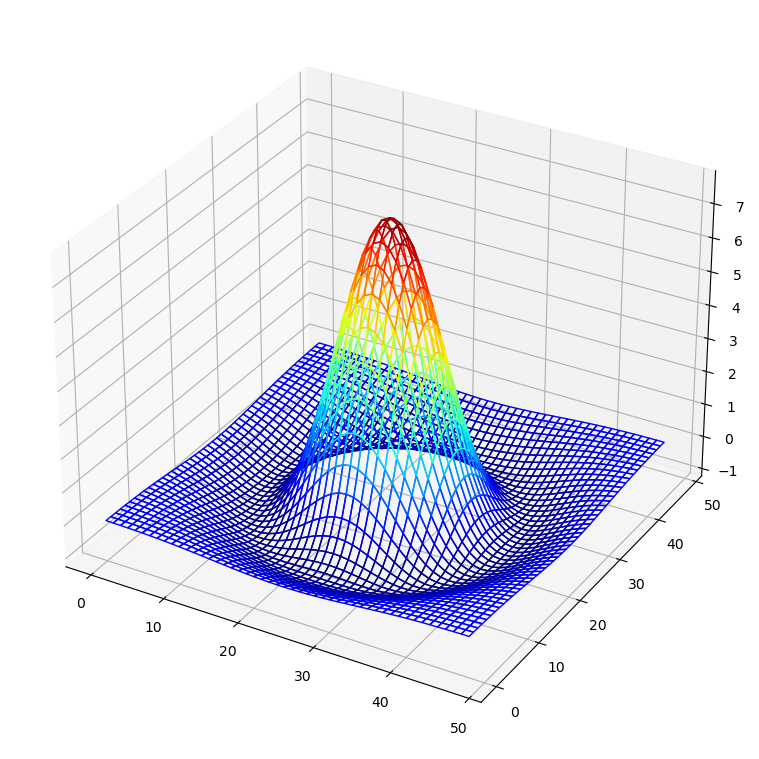

In [14]:
# Wireframe with color map
from matplotlib import cm
# Normalize the colors based on Z value
norm = plt.Normalize(Z2.min(), Z2.max())
colors = cm.jet(norm(Z2))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X2, Y2, Z2, facecolors=colors, shade=False)
surf.set_facecolor((0,0,0,0))

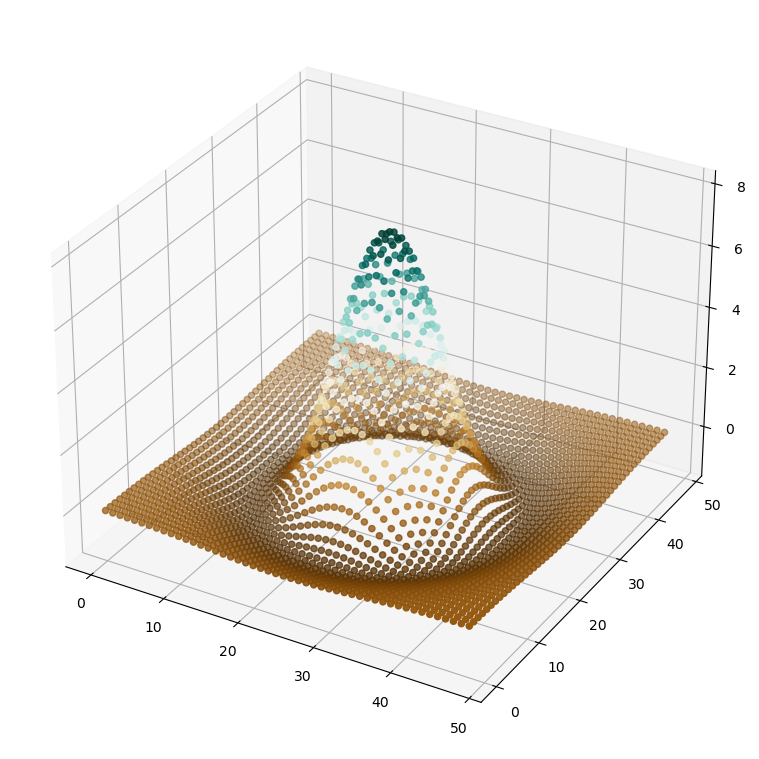

In [15]:
# Scatter plot 3D
ax = plt.axes(projection='3d')
ax.scatter(X1, Y1, Z1, c=Z1, cmap='BrBG', linewidth=1)

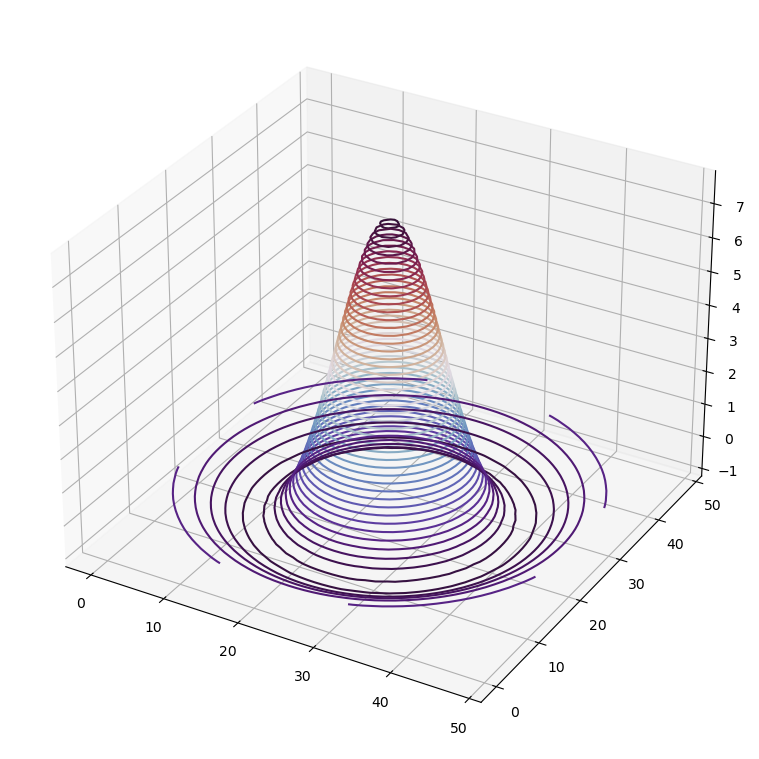

In [18]:
# Contour plot
ax = plt.axes(projection='3d')
ax.contour3D(X2, Y2, Z2, 55, cmap='twilight_shifted')

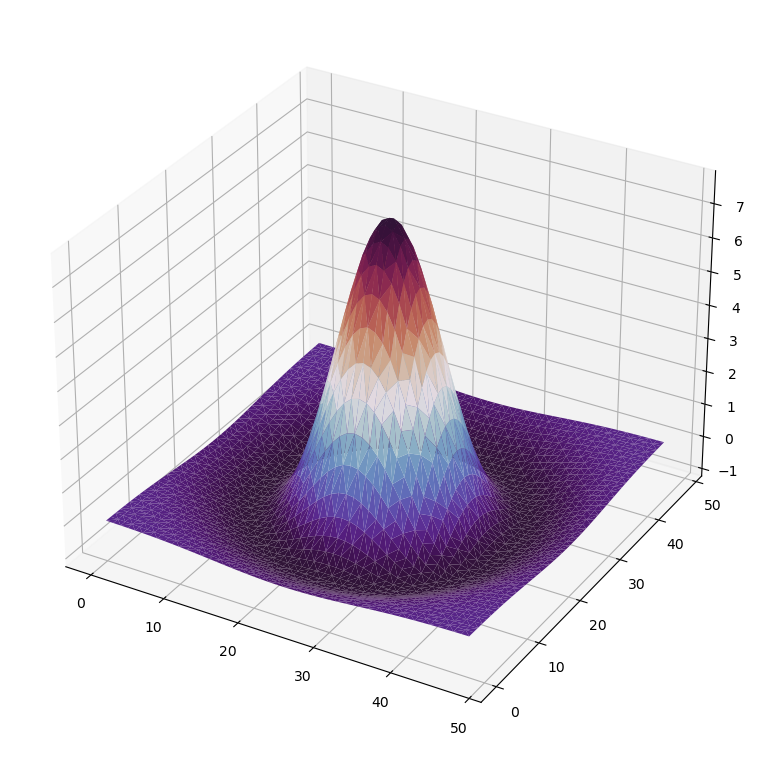

In [19]:
# Trisurft - creates a surface by first finding a set of triangles formed between adjacent points
ax = plt.axes(projection='3d')
ax.plot_trisurf(X1, Y1, Z1, cmap='twilight_shifted')

In [20]:
# Teapot
# Basic self-crafted script to read .obj file format
import numpy as np
def read_obj(filename):
    triangles = []
    vertices = []
    with open(filename) as file:
        for line in file:
            components = line.strip(' \n').split(' ')
            if components[0] == "f": # face data
                # e.g. "f 1/1/1/ 2/2/2 3/3/3 4/4/4 ..."
                indices = list(map(lambda c: int(c.split('/')[0]) - 1, components[1:]))
                for i in range(0, len(indices) - 2):
                    triangles.append(indices[i: i+3])
            elif components[0] == "v": # vertex data
                # e.g. "v  30.2180 89.5757 -76.8089"
                vertex = list(map(lambda c: float(c), components[1:]))
                vertices.append(vertex)
    return np.array(vertices), np.array(triangles)

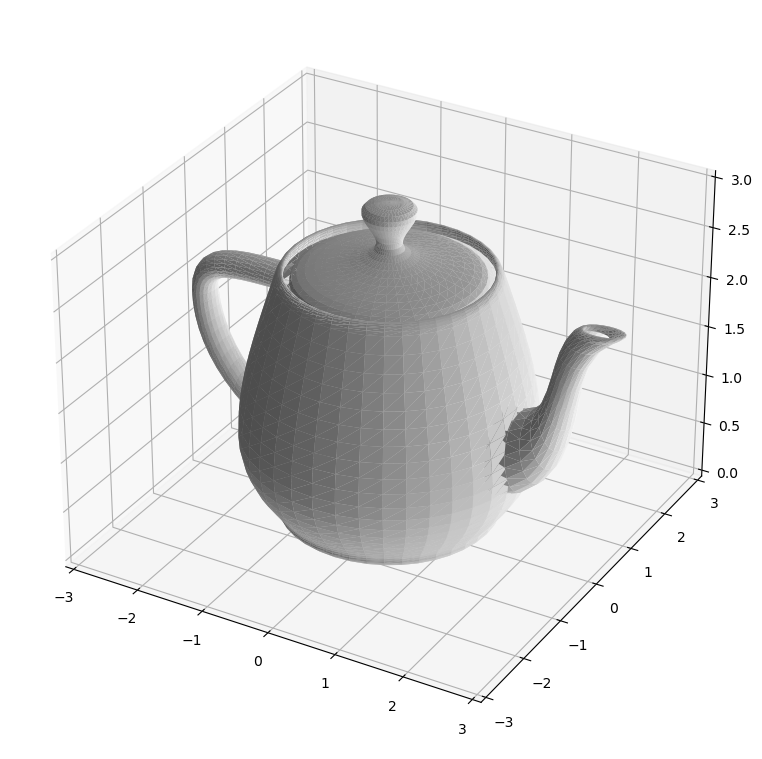

In [24]:
# Read Teapot.obj
vertices, triangles = read_obj("tetera.obj")
x = vertices[:,0]
y = vertices[:,1]
z = vertices[:,2]
ax = plt.axes(projection='3d')
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([0, 3])
ax.plot_trisurf(x, z, triangles, y, shade=True, color='white')